## Imports, data load, metric function definition

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import BallTree
import matplotlib.pyplot as plt
import time

import os
dossier = 'D:/DocDataM2/S3UE1_Datachallenge/'
os.chdir(dossier)

In [2]:
X = np.load('X_train_surge_new.npz')
Y = pd.read_csv('Y_train_surge.csv')
X_test_finale = np.load('X_test_surge_new.npz')

In [3]:
for cle in X:
    print(cle)

id_sequence
t_slp
slp
t_surge1_input
surge1_input
t_surge2_input
surge2_input
t_surge1_output
t_surge2_output


In [4]:
X_train = X
Y_train = Y


(5599,)
(5599, 40)
(5599, 40, 41, 41)

[-6.310764e+08 -6.310656e+08 -6.310548e+08 -6.310440e+08 -6.310332e+08
 -6.310224e+08 -6.310116e+08 -6.310008e+08 -6.309900e+08 -6.309792e+08
 -6.309684e+08 -6.309576e+08 -6.309468e+08 -6.309360e+08 -6.309252e+08
 -6.309144e+08 -6.309036e+08 -6.308928e+08 -6.308820e+08 -6.308712e+08
 -6.308604e+08 -6.308496e+08 -6.308388e+08 -6.308280e+08 -6.308172e+08
 -6.308064e+08 -6.307956e+08 -6.307848e+08 -6.307740e+08 -6.307632e+08
 -6.307524e+08 -6.307416e+08 -6.307308e+08 -6.307200e+08 -6.307092e+08
 -6.306984e+08 -6.306876e+08 -6.306768e+08 -6.306660e+08 -6.306552e+08]


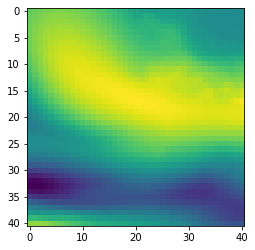

In [7]:
# Que contient id sequence et slp ?

print(X_train['id_sequence'].shape)
print(X_train['t_slp'].shape)
print(X_train['slp'].shape)
print()

print(X_train['t_slp'][0,:])

image = X_train['slp'][0, 0, :, : ]     # Une image
plt.imshow(image)                       # 


(5599, 10)
(10,)
[-6.311088e+08 -6.310656e+08 -6.310188e+08 -6.309756e+08 -6.309288e+08
 -6.308856e+08 -6.308424e+08 -6.307992e+08 -6.307524e+08 -6.307092e+08]
[-0.54593754  0.13110517  0.31880018  0.19478741 -0.22752637 -0.4018146
 -0.87440383 -0.63978505 -1.0755056  -1.712328  ]


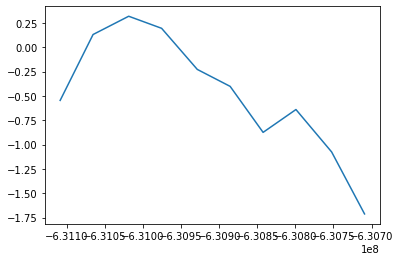

In [5]:
# Que contient surge1 ?

print(X_train['surge1_input'].shape)
print(X_train['surge1_input'][1].shape)

t = X_train['t_surge1_input'][0]
y = X_train['surge1_input'][0]

print(t)
print(y)
plt.plot(t,y)

(5599, 10)
(10,)
[-6.311016e+08 -6.310584e+08 -6.310152e+08 -6.309684e+08 -6.309252e+08
 -6.308820e+08 -6.308352e+08 -6.307920e+08 -6.307488e+08 -6.307020e+08]
[-0.41432458 -1.0094675  -1.2022604  -1.193878   -1.1435843  -0.81667477
 -0.7579987  -0.12932655 -0.17962031 -0.3724131 ]


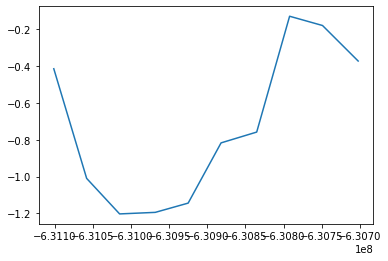

In [8]:
# Que contient surge2 ?

print(X_train['surge2_input'].shape)
print(X_train['surge2_input'][1].shape)

t = X_train['t_surge2_input'][0]
y = X_train['surge2_input'][0]

print(t)
print(y)
plt.plot(t,y)

In [ ]:
# TODO : créer un jeu d'entrainement / jeu de test
X_train = X
Y_train = Y

5599
1	 368.981184	 369.3808	 368.981184
6	 369.424	 369.8272	 0.04319999999995616
11	 371.576832	 371.9728	 1.7496320000000196
16	 372.019584	 372.4192	 0.04678400000000238
21	 372.465984	 372.876416	 0.04678400000000238
26	 379.932416	 380.3392	 7.055999999999983
31	 380.385984	 380.782016	 0.04678400000000238
36	 382.1248	 382.528	 1.3427839999999946
41	 382.5712	 382.9744	 0.04319999999995616
46	 384.317184	 384.7168	 1.3427839999999946
51	 384.763584	 385.1632	 0.04678400000000238
56	 386.5024	 386.909184	 1.3392000000000053
61	 386.952384	 387.355584	 0.043200000000013006
66	 388.694784	 389.097984	 1.3392000000000053
71	 389.144832	 389.548032	 0.046848000000011325
76	 389.594816	 389.990784	 0.04678400000000238
81	 391.333632	 391.740416	 1.3428480000000036
86	 391.783616	 392.186816	 0.043200000000013006
91	 393.526016	 393.925632	 1.3392000000000053
96	 393.972416	 394.3792	 0.04678400000000238
101	 395.7184	 396.118016	 1.3391999999999484
106	 396.161216	 396.568	 0.04320000

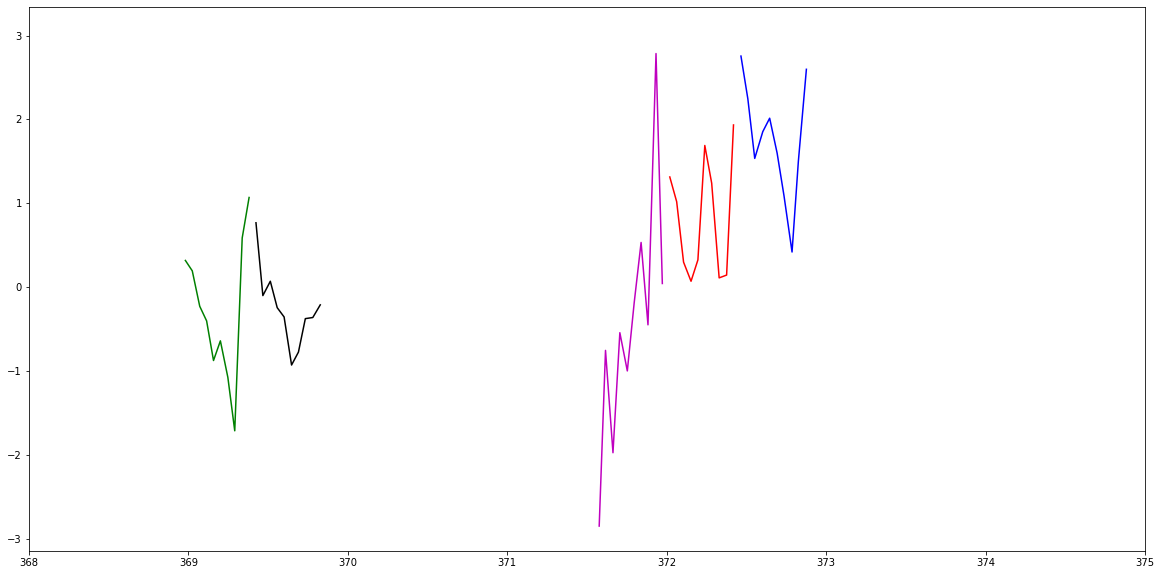

In [83]:
N = 30
pas = 5

t_temp = 0
t = []
y = []
plt.figure(figsize=(20,10))
colors = ["b", "g", "r", "c", "m", "y", "k"]

print(len(X_train['t_surge1_input']))

for k in range(1, 1+N*pas, pas):
    
    tt = list((X_train['t_surge1_input'][k]+1000000000)/1000000)
    
    print(f"{k}\t {min(tt)}\t {max(tt)}\t ", end='')
    
    print(f"{tt[0]-t_temp}")
    
    
    """
    dates = []
    # transformation en date :
    for date_nb in tt:
        dates.append(time.gmtime(date_nb))
    t += dates
    #print(dates)
    """

    yy = X_train['surge1_input'][k]
    #print(yy)
    y += list(yy)
    plt.xlim((368,375))
    plt.plot(tt, yy, color = colors[k%7])

    t_temp = tt[-1]  # derniere date

plt.show()


In [ ]:
#print(len(t))
for k in range(len(t)-1):
    #print(k)
    if not t[k]<t[k+1]:

        print(f'retour à k = {k}')

#print(t)

# AUTREMENT DIT : toutes les 5 lignes, les dates se suivent !! en fait non, c'est plus compliqué !!

In [86]:
# tentative de suppression des données redondantes 

t_prec = -1000000000000000

dico = {}

for k in range(5599):

    time = X_train['t_surge1_input'][k][0]

    if time-t_prec>0:
        dico[k] = X_train['t_surge1_input'][k]

    t_prec = X_train['t_surge1_input'][k][-1]


In [87]:
dico


{0: array([-6.311088e+08, -6.310656e+08, -6.310188e+08, -6.309756e+08,
        -6.309288e+08, -6.308856e+08, -6.308424e+08, -6.307992e+08,
        -6.307524e+08, -6.307092e+08], dtype=float32),
 11: array([-6.284232e+08, -6.283836e+08, -6.283368e+08, -6.282936e+08,
        -6.282468e+08, -6.282036e+08, -6.281604e+08, -6.281172e+08,
        -6.280668e+08, -6.280272e+08], dtype=float32),
 22: array([-6.204240e+08, -6.203808e+08, -6.203376e+08, -6.202908e+08,
        -6.202476e+08, -6.202044e+08, -6.201576e+08, -6.201144e+08,
        -6.200676e+08, -6.200244e+08], dtype=float32),
 33: array([-6.181416e+08, -6.180984e+08, -6.180552e+08, -6.180084e+08,
        -6.179652e+08, -6.179184e+08, -6.178752e+08, -6.178320e+08,
        -6.177888e+08, -6.177420e+08], dtype=float32),
 44: array([-6.158664e+08, -6.158196e+08, -6.157728e+08, -6.157296e+08,
        -6.156828e+08, -6.156396e+08, -6.155928e+08, -6.155496e+08,
        -6.155028e+08, -6.154632e+08], dtype=float32),
 55: array([-6.135876e+08,

In [8]:
for cle in X_train:
    print(X_train[cle])

[   1    2    3 ... 5597 5598 5599]
[[-6.3107642e+08 -6.3106560e+08 -6.3105478e+08 ... -6.3067680e+08
  -6.3066598e+08 -6.3065523e+08]
 [-6.3097920e+08 -6.3096838e+08 -6.3095757e+08 ... -6.3057958e+08
  -6.3056883e+08 -6.3055802e+08]
 [-6.3089280e+08 -6.3088198e+08 -6.3087117e+08 ... -6.3049318e+08
  -6.3048243e+08 -6.3047162e+08]
 ...
 [ 1.2876516e+09  1.2876623e+09  1.2876732e+09 ...  1.2880512e+09
   1.2880620e+09  1.2880728e+09]
 [ 1.2877380e+09  1.2877489e+09  1.2877596e+09 ...  1.2881376e+09
   1.2881484e+09  1.2881592e+09]
 [ 1.2878351e+09  1.2878460e+09  1.2878568e+09 ...  1.2882348e+09
   1.2882456e+09  1.2882564e+09]]
[[[[102389.25 102458.25 102514.25 ... 101276.25 101275.25 101271.25]
   [102432.25 102509.25 102572.25 ... 101268.25 101266.25 101268.25]
   [102467.25 102552.25 102624.25 ... 101255.25 101255.25 101256.25]
   ...
   [101414.25 101423.25 101407.25 ... 100039.25 100005.25 100019.25]
   [101986.25 102006.25 101961.25 ... 100100.25 100076.25 100096.25]
   [102685.2

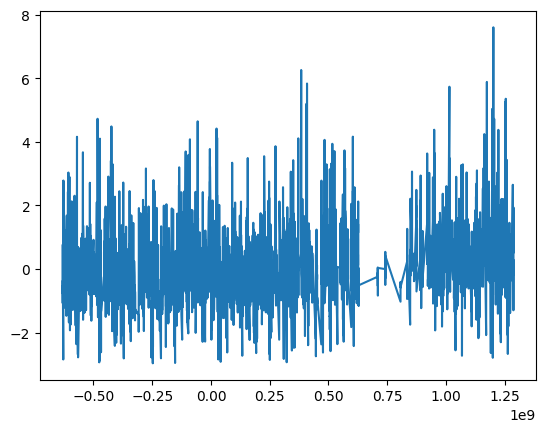

In [5]:
plt.plot(X_train['t_surge1_input'][:,0],X_train['surge1_input'][:,0])  
    # Chaque ligne (ici i=0) correspond à un jour
    # chaque colonne correspond à 1 heure précise, chaque jour
    

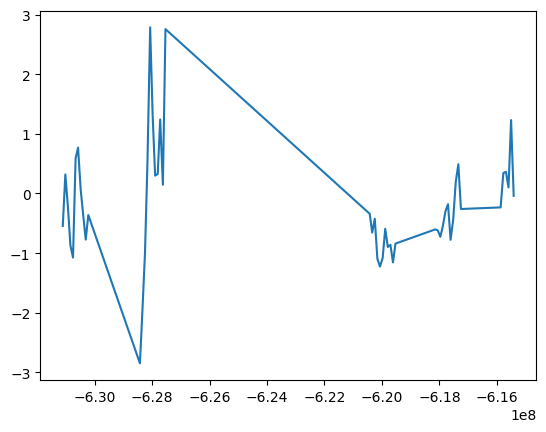

In [6]:
plt.plot(X_train['t_surge1_input'][:50,0],X_train['surge1_input'][:50,0])  
    # Chaque ligne (ici i=0) correspond à un jour
    # chaque colonne correspond à 1 heure précise, chaque jour

In [7]:
DATES = X_train['t_surge1_input']
DATES_f = DATES.flatten()

VALS = X_train['surge1_input']
VALS_f = VALS.flatten()  # Flatten à revoir : pb de concaténation

print(VALS.shape)   # 5599 jours = 180 mois = 15 ans  x 10

# On doit concatener ? Avec flatten (ligne l'une après l'autre):
#plt.plot(DATES_f, VALS_f)  # Chaque ligne (ici i=0) correspond à un jour

(5599, 10)


In [21]:
print(DATES_f.astype(int)[0])
time.gmtime(-10)

-631108800


time.struct_time(tm_year=1969, tm_mon=12, tm_mday=31, tm_hour=23, tm_min=59, tm_sec=50, tm_wday=3, tm_yday=365, tm_isdst=0)

In [44]:
f = lambda x: time.gmtime(x)
DATES_lisible = list(map(f, DATES_f.astype(int)))           # TODO : trouver l'erreur et vérifier que flaten est ok
print(DATES_3)

OSError: [Errno 22] Invalid argument

In [1]:
import datetime
import time
import calendar
time.gmtime(100000)

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=2, tm_hour=3, tm_min=46, tm_sec=40, tm_wday=4, tm_yday=2, tm_isdst=0)

In [3]:
datetime.date.fromtimestamp(10)


datetime.date(1970, 1, 1)

In [7]:
datetime.datetime.utcfromtimestamp(-1000000)
calendar.timegm((1950,1,1,0,0,0,0))
time.gmtime(-100000)

OSError: [Errno 22] Invalid argument

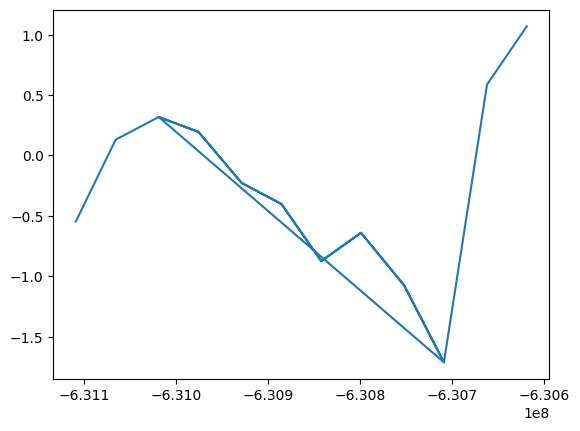

In [19]:
# 100 dernières:
plt.plot(X_train['t_surge1_input'].flatten()[0:20],X_train['surge1_input'].flatten()[0:20])  # Chaque ligne (ici i=0) correspond à un jour

In [12]:
# 40 images 41x41
print(np.shape(X_train['slp']))

(5599, 40, 41, 41)

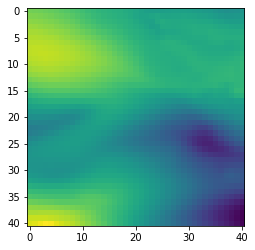

In [89]:
image = X_train['slp'][0, 0, :, : ]     # Une image
plt.imshow(image)                       # 

FileNotFoundError: [Errno 2] No such file or directory: 'images/ligne_{ligne}_k_{k}.png'

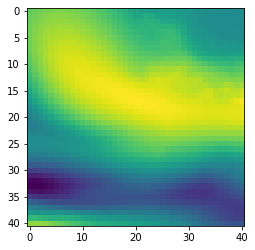

In [94]:
ligne = 0

for k in range(20):
    image = X_train['slp'][ligne, k, :, : ]     # Une image
    plt.imshow(image)                       # 
    plt.savefig("images/ligne_{ligne}_k_{k}")


TypeError: an integer is required (got type list)

In [7]:
surge_train = np.array(Y_train)[:,1]

In [16]:
def surge_prediction_metric(dataframe_y_true, dataframe_y_pred):
    weights = np.linspace(1, 0.1, 10)[np.newaxis]
    surge1_columns = [
        'surge1_t0', 'surge1_t1', 'surge1_t2', 'surge1_t3', 'surge1_t4',
        'surge1_t5', 'surge1_t6', 'surge1_t7', 'surge1_t8', 'surge1_t9' ]
    surge2_columns = [
        'surge2_t0', 'surge2_t1', 'surge2_t2', 'surge2_t3', 'surge2_t4',
        'surge2_t5', 'surge2_t6', 'surge2_t7', 'surge2_t8', 'surge2_t9' ]
    surge1_score = (weights * (dataframe_y_true[surge1_columns].values - dataframe_y_pred[surge1_columns].values)**2).mean()
    surge2_score = (weights * (dataframe_y_true[surge2_columns].values - dataframe_y_pred[surge2_columns].values)**2).mean()

    return surge1_score + surge2_score

## Benchmark
Train using kNN of pressure fields at two instants in time, with 40 neighbours

In [27]:
nfields = 2; time_step_slp = 8
slp_train = []
slp_all = X_train['slp']
for i in range(5559):
    slp_train.append(np.ndarray.flatten(slp_all[i,-1]))
    for j in range(1,nfields):
        slp_train[-1] = np.concatenate( ( slp_train[-1], np.ndarray.flatten(slp_all[i,-1-j*time_step_slp]) ) )
slp_train = np.array(slp_train)

In [6]:
slp_test = []
slp_all_test = X_test['slp']
for i in range(509):
    slp_test.append(np.ndarray.flatten(slp_all_test[i,-1]))
    for j in range(1,nfields):
        slp_test[-1] = np.concatenate( ( slp_test[-1], np.ndarray.flatten(slp_all_test[i,-1-j*time_step_slp]) ) )
slp_test = np.array(slp_test)

In [7]:
tree = BallTree(slp_train)

In [8]:
surge_test_benchmark = []; k = 40
for i in range(509):
    dist, ind = tree.query([slp_test[i]], k=k)
    surge_test_benchmark.append(np.mean(surge_train[ind[0]], axis=0))
surge_test_benchmark = np.array(surge_test_benchmark)

In [9]:
y_columns = [f'surge1_t{i}' for i in range(10)] + [f'surge2_t{i}' for i in range(10)]
y_test_benchmark = pd.DataFrame(data=surge_test_benchmark, columns=y_columns, index=X_test['id_sequence'])
y_test_benchmark.to_csv('Y_test_benchmark.csv', index_label='id_sequence', sep=',')